# Instalando pacotes

In [ ]:
!pip install plotly --upgrade
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Leitura do CSV

In [ ]:
db_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
db_diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Pre processamento

In [ ]:
db_diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# Removendo valores nulos
db_diabetes = db_diabetes.dropna()

In [ ]:
db_diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


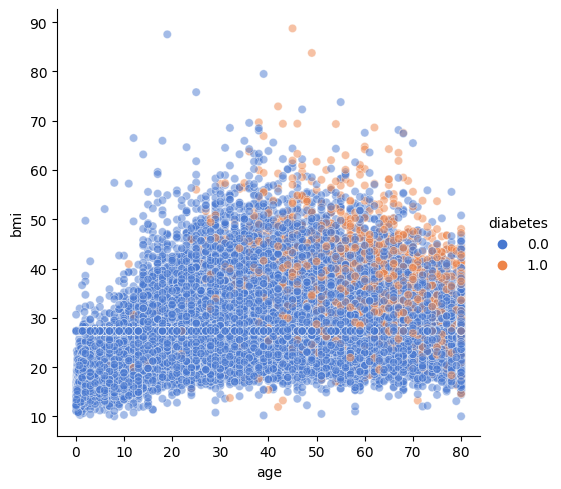

In [ ]:
sns.relplot(x="age", y="bmi", hue="diabetes",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=5, data=db_diabetes);

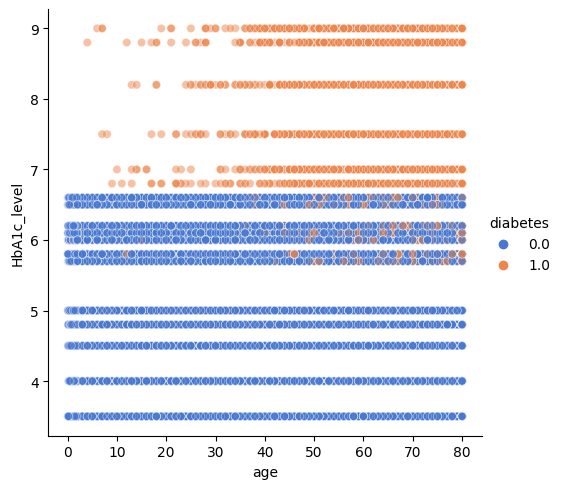

In [ ]:
sns.relplot(x="age", y="HbA1c_level", hue="diabetes",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=5, data=db_diabetes)

# sns.countplot(x = db_diabetes['HbA1c_level'])

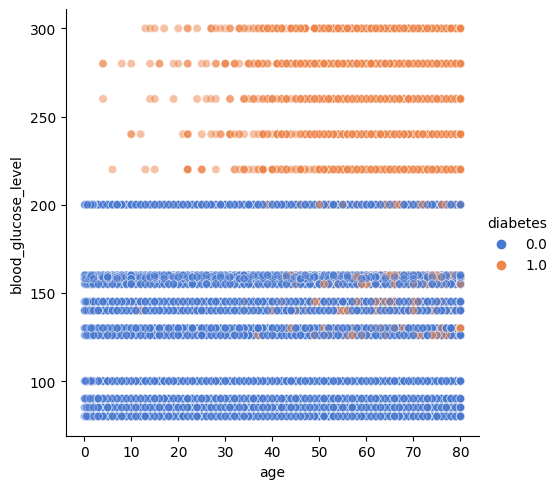

In [ ]:
sns.relplot(x="age", y="blood_glucose_level", hue="diabetes",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=5, data=db_diabetes)

# sns.countplot(x = db_diabetes['blood_glucose_level'])

## Divisão previsores e classes

In [ ]:
X_diabetes = db_diabetes.iloc[:, 0:8].values
Y_diabetes = db_diabetes.iloc[:, 8].values

X_diabetes, Y_diabetes

(array([['Female', 80.0, 0, ..., 25.19, 6.6, 140],
        ['Female', 54.0, 0, ..., 27.32, 6.6, 80],
        ['Male', 28.0, 0, ..., 27.32, 5.7, 158],
        ...,
        ['Male', 66.0, 0, ..., 27.83, 5.7, 155],
        ['Female', 24.0, 0, ..., 35.42, 4.0, 100],
        ['Female', 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object),
 array([0, 0, 0, ..., 0, 0, 0]))

## LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_gender = LabelEncoder()
lb_smoking_history = LabelEncoder()

X_diabetes[:, 0] = lb_gender.fit_transform(X_diabetes[:, 0])
X_diabetes[:, 4] = lb_smoking_history.fit_transform(X_diabetes[:, 4])

pd.DataFrame(X_diabetes)

,0,1,2,3,4,5,6,7
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_diabetes = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0, 4])], remainder='passthrough')

X_diabetes = onehotencoder_diabetes.fit_transform(X_diabetes)

pd.DataFrame(X_diabetes)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0,1,25.19,6.6,140
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54.0,0,0,27.32,6.6,80
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,0,0,27.32,5.7,158
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,0,0,23.45,5.0,155
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,80.0,0,0,27.32,6.2,90
99996,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,17.37,6.5,100
99997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66.0,0,0,27.83,5.7,155
99998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,0,0,35.42,4.0,100


## Escalando valores

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_diabetes = scaler.fit_transform(X_diabetes)

pd.DataFrame(X_diabetes)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.841358,-0.841046,-0.013418,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704
1,0.841358,-0.841046,-0.013418,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210
2,-1.188554,1.188995,-0.013418,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878
3,0.841358,-0.841046,-0.013418,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183
4,-1.188554,1.188995,-0.013418,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.841358,-0.841046,-0.013418,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,1.692704,-0.284439,-0.202578,-0.000116,0.628107,-1.180558
99996,0.841358,-0.841046,-0.013418,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,-1.771388,-0.284439,-0.202578,-1.499343,0.908306,-0.934905
99997,-1.188554,1.188995,-0.013418,-0.747008,-0.319946,-0.20423,3.113342,-0.735332,-0.262512,1.070944,-0.284439,-0.202578,0.076729,0.161108,0.416183
99998,0.841358,-0.841046,-0.013418,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,-0.794336,-0.284439,-0.202578,1.220361,-1.426688,-0.934905


# Divisão base treinamento e test

In [ ]:
from sklearn.model_selection import train_test_split

X_diabetes_train, X_diabetes_test, Y_diabetes_train, Y_diabetes_test = train_test_split(X_diabetes, Y_diabetes, test_size = 0.15, random_state = 0)

## Salvando PKL

In [ ]:
import pickle

with open('diabetes.pkl', mode = 'wb') as f:
  pickle.dump([X_diabetes_train, X_diabetes_test, Y_diabetes_train, Y_diabetes_test], f)

# Treinamento em RN

In [ ]:
import pickle

with open('diabetes.pkl', 'rb') as f:
  X_diabetes_train, X_diabetes_test, Y_diabetes_train, Y_diabetes_test = pickle.load(f)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Melhor Config com base no GridSearchCV {'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
rn_diabetes = MLPClassifier(activation='relu', batch_size=56, solver='adam')

rn_diabetes.fit(X_diabetes_train, Y_diabetes_train);

## Resultados

In [ ]:
predict_diabetes = rn_diabetes.predict(X_diabetes_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(Y_diabetes_test, predict_diabetes)), accuracy_score(Y_diabetes_test, predict_diabetes) * 100

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13732
           1       0.99      0.68      0.81      1268

    accuracy                           0.97     15000
   macro avg       0.98      0.84      0.90     15000
weighted avg       0.97      0.97      0.97     15000



(None, 97.24000000000001)

0.9724

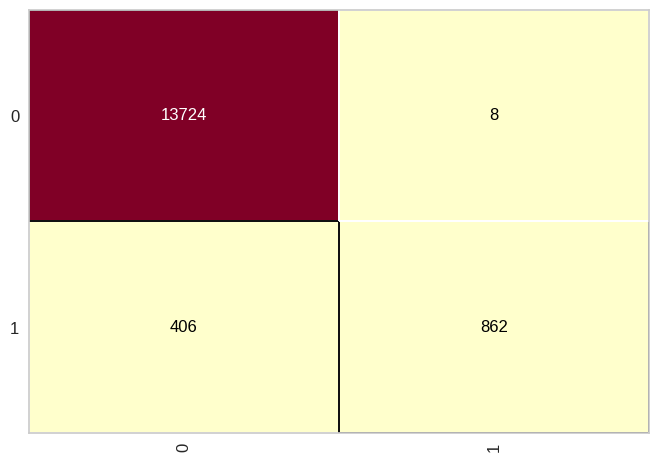

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rn_diabetes)
cm.fit(X_diabetes_train, Y_diabetes_train)
cm.score(X_diabetes_test, Y_diabetes_test)

# Melhor configuração da RN

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
import pickle

with open('diabetes.pkl', 'rb') as f:
  X_diabetes_train, X_diabetes_test, Y_diabetes_train, Y_diabetes_test = pickle.load(f)

## Juntanto base Treinamento + Teste

In [ ]:
import numpy as np

X_diabetes = np.concatenate((X_diabetes_train, X_diabetes_test), axis = 0)
X_diabetes.shape

(100000, 15)

In [ ]:
Y_diabestes = np.concatenate((Y_diabetes_train, Y_diabetes_test), axis = 0)
Y_diabestes.shape

(100000,)

## GridSearchCV

In [ ]:
params = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=params)

grid_search.fit(X_diabetes, Y_diabestes)

best_params = grid_search.best_params_
best_result = grid_search.best_score_

print(best_params)
print(best_result)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.97181


# Salvar classificador

In [3]:
import pickle
import numpy as np

with open('diabetes.pkl', 'rb') as f:
  X_diabetes_train, X_diabetes_test, Y_diabetes_train, Y_diabetes_test = pickle.load(f)

X_diabetes = np.concatenate((X_diabetes_train, X_diabetes_test), axis = 0)
Y_diabetes = np.concatenate((Y_diabetes_train, Y_diabetes_test), axis = 0)

In [5]:
from sklearn.neural_network import MLPClassifier

rn_classifier = MLPClassifier(activation='relu', batch_size=56, solver='adam')
rn_classifier.fit(X_diabetes, Y_diabetes);

In [ ]:
import pickle

pickle.dump(rn_classifier, open('rn_final_diabetes.sav', 'wb'))